In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

AdaBoost (Adaptive Boosting) uses a series of weak learners (base classifiers) to create a strong classifier. The weights are assigned to both the classifiers and the training instances. 

Steps Involved in AdaBoost:

Initialize Weights: Assign equal weights to all training samples initially.

Build Base Model: Train a base classifier (e.g., decision tree) on the training data with the current weights.

Compute Error: Compute the error of the base classifier by comparing its predictions with the actual labels, weighted by the sample weights.

Calculate Classifier Weight: Calculate the weight of the base classifier based on its error. More accurate classifiers are given higher weights.

Update Sample Weights: Update the weights of the training samples. Increase the weights of incorrectly classified samples so that they are more likely to be correctly classified in the next iteration.

Repeat: Repeat steps 2-5 for a predefined number of iterations or until a stopping criterion is met.

Combine Classifiers: Combine the individual classifiers (e.g., by weighted majority voting) to make final predictions.

Working Principle of AdaBoost:

AdaBoost works by sequentially training a series of weak learners (base classifiers), where each learner focuses on the samples that the previous learners found difficult to classify correctly. It assigns higher weights to misclassified samples, forcing subsequent learners to focus more on these challenging samples. By iteratively adjusting the sample weights and combining the weak learners' predictions, AdaBoost constructs a strong ensemble classifier that performs well even on complex datasets.

Advantages of AdaBoost:

High Accuracy: AdaBoost typically achieves higher accuracy than individual base classifiers, especially when using simple weak learners.

Versatility: AdaBoost can be applied to various types of base classifiers, making it flexible and adaptable to different types of data and problem domains.

Disadvantages of AdaBoost:

Sensitive to Noisy Data and Outliers: AdaBoost is sensitive to noisy data and outliers, as misclassified samples are assigned higher weights and can dominate the training process, leading to overfitting.

Computationally Expensive: AdaBoost can be computationally expensive, especially when using complex base classifiers or training on large datasets, as it requires multiple iterations to build the ensemble.

Formulas used:

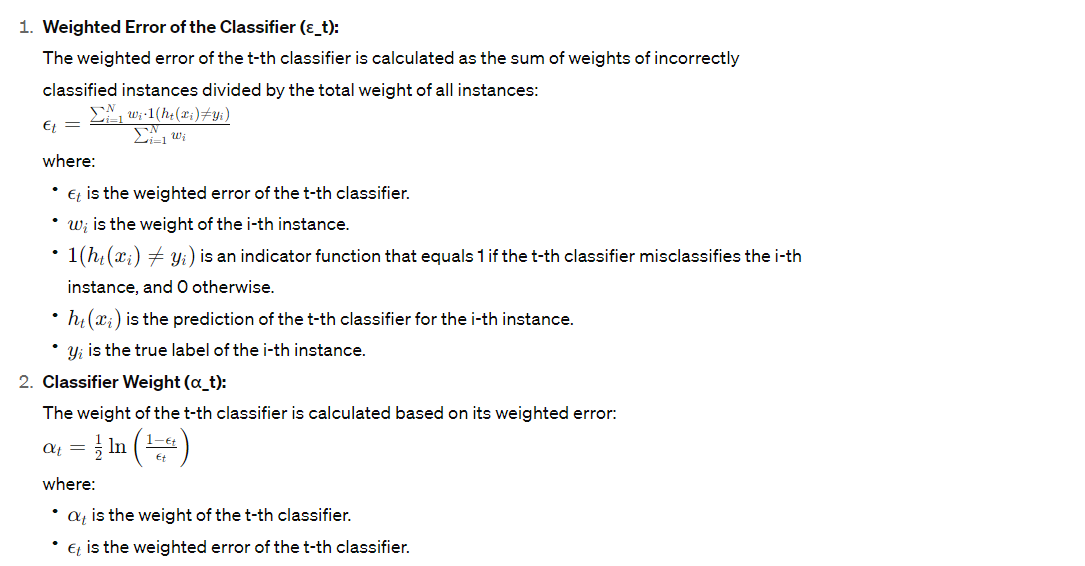
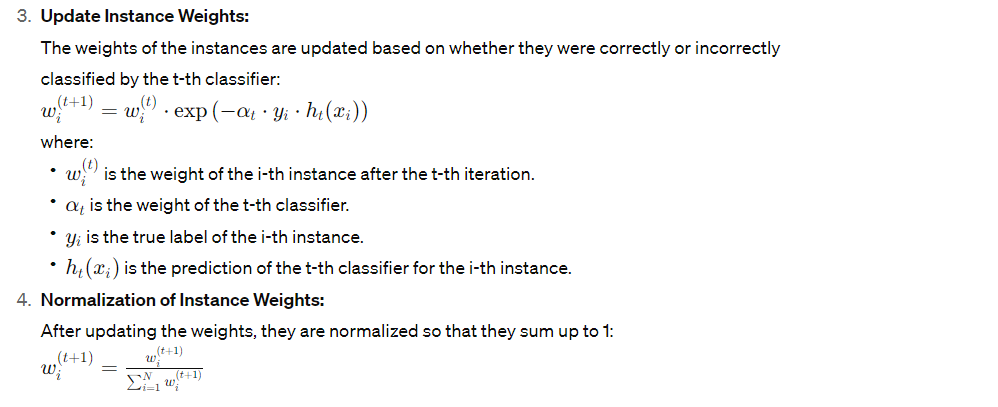

#### Adaboost Code

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 50}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


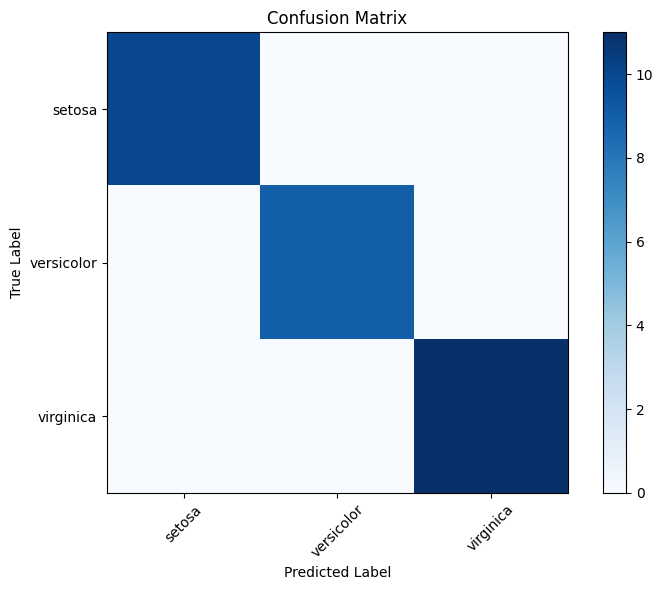

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(adaboost_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize AdaBoost classifier with best hyperparameters
best_adaboost_clf = AdaBoostClassifier(**best_params, random_state=42)

# Train the model
best_adaboost_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = best_adaboost_clf.predict(X_test_scaled)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()